In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from itertools import combinations
from collections import Counter

##**Merging all DFs together**##

In [ ]:
path = '/content/drive/MyDrive/Data_Science/Portfolio/Sales/Sales_Data'
print(path)

files = [f for f in os.listdir(path) if not f.startswith('.')] #Ignoring hidden files
all_data = pd.DataFrame()

for file in files:
    
    print(file)
    current_data = pd.read_csv(path+"/"+file)
    all_data = pd.concat([all_data, current_data])

all_data.to_csv('/content/drive/MyDrive/Data_Science/Portfolio/Sales/Sales_Data/all_data.csv', index=False)

/content/drive/MyDrive/Data_Science/Portfolio/Sales/Sales_Data
Sales_April_2019.csv
Sales_September_2019.csv
Sales_August_2019.csv
Sales_February_2019.csv
Sales_December_2019.csv
Sales_May_2019.csv
Sales_March_2019.csv
Sales_November_2019.csv
Sales_June_2019.csv
Sales_October_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv


##**Initial DF analysis**##

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data_Science/Portfolio/Sales/Sales_Data/all_data.csv')
df.head()
df_aux = df.copy()

In [ ]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [ ]:
df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [ ]:
df_null = df[df.isna().any(axis=1)]
df_null.shape

(545, 6)

In [ ]:
df_null.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [ ]:
df = df.dropna(how='all')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


##**Transforming Columns**##

In [ ]:
df_aux['Order Date'] = pd.to_datetime(df_aux['Order Date'], errors='coerce')

In [ ]:
null = df_aux[df_aux['Order Date'].isnull()]
null.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaT,NaN
356,NaN,NaN,NaN,NaN,NaT,NaN
519,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address
735,NaN,NaN,NaN,NaN,NaT,NaN
1149,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address


In [ ]:
print(df[df['Order ID'] == 'Order ID'])

        Order ID  Product  Quantity Ordered  Price Each  Order Date  \
519     Order ID  Product  Quantity Ordered  Price Each  Order Date   
1149    Order ID  Product  Quantity Ordered  Price Each  Order Date   
1155    Order ID  Product  Quantity Ordered  Price Each  Order Date   
2878    Order ID  Product  Quantity Ordered  Price Each  Order Date   
2893    Order ID  Product  Quantity Ordered  Price Each  Order Date   
...          ...      ...               ...         ...         ...   
182788  Order ID  Product  Quantity Ordered  Price Each  Order Date   
184468  Order ID  Product  Quantity Ordered  Price Each  Order Date   
184516  Order ID  Product  Quantity Ordered  Price Each  Order Date   
185160  Order ID  Product  Quantity Ordered  Price Each  Order Date   
186387  Order ID  Product  Quantity Ordered  Price Each  Order Date   

        Purchase Address  
519     Purchase Address  
1149    Purchase Address  
1155    Purchase Address  
2878    Purchase Address  
2893    Purc

In [ ]:
df = df[df['Order ID'] != 'Order ID']

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [ ]:
df['Month'] = df['Order Date'].dt.month

In [ ]:
# 917 1st St, Dallas, TX 75001
def get_city(address):

  return address.split(",")[1].strip(" ")

def get_state(address):

  return address.split(",")[2].strip(" ").split(" ")[0]


df['City'] = df['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


In [ ]:
#get hour of the day
df['Hour'] = df['Order Date'].dt.hour
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),22
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),9


In [ ]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)
df['Price Each'] = df['Price Each'].astype(float)
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

In [ ]:
print(np.sort(df['Price Each'].unique()))

[   2.99    3.84   11.95   11.99   14.95   99.99  109.99  149.99  150.
  300.    379.99  389.99  400.    600.    700.    999.99 1700.  ]


In [ ]:
#creating price categories
def get_price_category(price):

  if price <= 10:
      return '0-10'
  if (( price > 10) & (price <= 20)):
      return '10-20'

  if (( price > 90 ) & (price <= 150 )):
      return '90-150'

  if (( price > 150 ) & (price <= 400 )):
      return '150-400'

  if (( price > 500 ) & (price <= 900 )):
      return '500-900'

  else:
      return '1000 +'

df['Price Category'] = df['Price Each'].apply(lambda x: get_price_category(x))

In [ ]:
df['Price Category'].value_counts()

10-20      62443
0-10       41218
90-150     40482
150-400    19276
500-900    13679
1000 +      8852
Name: Price Category, dtype: int64

##**Exploratory Data Analysis**##

**Sales by Month**

In [ ]:
df.groupby('Month').sum().sort_values('Sales', ascending=False)

,Quantity Ordered,Price Each,Hour,Sales
Month,,,,
12,28114,4588415.41,359978,4613443.34
10,22703,3715554.83,290650,3736726.88
4,20558,3367671.02,262259,3390670.24
11,19798,3180600.68,254865,3199603.20
5,18667,3135125.13,238780,3152606.75
3,17005,2791207.83,218969,2807100.38
7,16072,2632539.56,206169,2647775.76
6,15253,2562025.61,195528,2577802.26
8,13448,2230345.42,172289,2244467.88


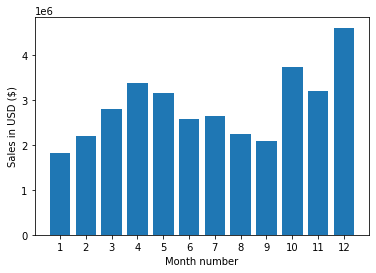

In [ ]:
months = [month for month, df in df.groupby('Month')]

plt.bar(months,df.groupby(['Month']).sum()['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.xticks(months)
plt.show()

**Sales by Product**

In [ ]:
df.groupby('Product').sum().sort_values('Quantity Ordered', ascending=False)

,Quantity Ordered,Price Each,Month,Hour,Sales
Product,,,,,
AAA Batteries (4-pack),31017,61716.59,146370,297332,92740.83
AA Batteries (4-pack),27635,79015.68,145558,298342,106118.40
USB-C Charging Cable,23975,261740.85,154819,314645,286501.25
Lightning Charging Cable,23217,323787.10,153092,312529,347094.15
Wired Headphones,20557,226395.18,133397,271720,246478.43
Apple Airpods Headphones,15661,2332350.00,109477,223304,2349150.00
Bose SoundSport Headphones,13457,1332366.75,94113,192445,1345565.43
27in FHD Monitor,7550,1125974.93,52558,107540,1132424.50
iPhone,6849,4789400.00,47941,98657,4794300.00


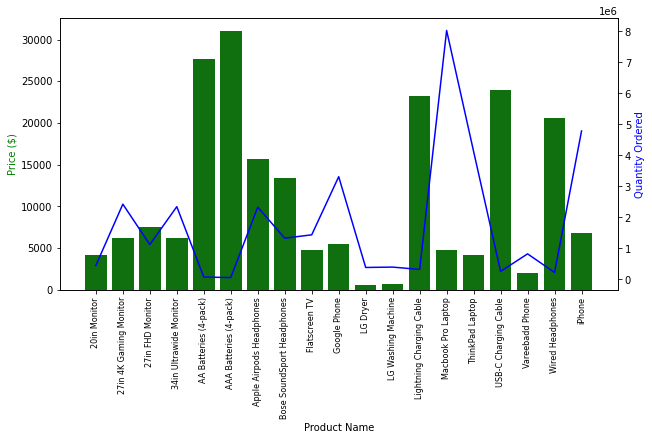

In [ ]:
products = [product for product, df in df.groupby('Product')]

fig=plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

# plotting
sns.barplot(x=products,y=df.groupby('Product').sum()['Quantity Ordered'],color='green',ax=ax1)
sns.lineplot(x=products,y=df.groupby('Product').sum()['Price Each'],color='blue',ax=ax2)

#axis configs
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Price ($)', color='g')
ax2.set_ylabel('Quantity Ordered', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

fig.show()

**Sales by City**

In [ ]:
df.groupby('City').sum().sort_values('Sales', ascending=False)

,Quantity Ordered,Price Each,Month,Hour,Sales
City,,,,,
San Francisco (CA),50239,8211461.74,315520,643265,8262203.91
Los Angeles (CA),33289,5421435.23,208325,427444,5452570.80
New York City (NY),27932,4635370.83,175741,357696,4664317.43
Boston (MA),22528,3637409.77,141112,288225,3661642.01
Atlanta (GA),16602,2779908.20,104794,214264,2795498.58
Dallas (TX),16730,2752627.82,104620,214390,2767975.40
Seattle (WA),16553,2733296.01,104941,213292,2747755.48
Portland (OR),11303,1860558.22,70621,144421,1870732.34
Austin (TX),11153,1809873.61,69829,141946,1819581.75


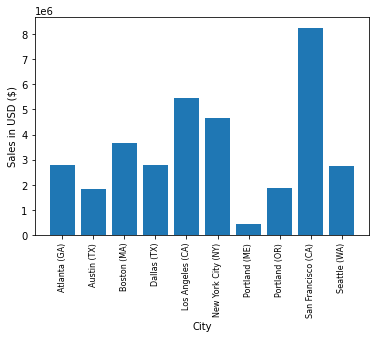

In [ ]:
cities = [city for city, df in df.groupby('City')]

plt.bar(cities,df.groupby(['City']).sum()['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('City')
plt.xticks(cities, rotation='vertical', size=8)
plt.show()



**Sales by Hour of the Day**

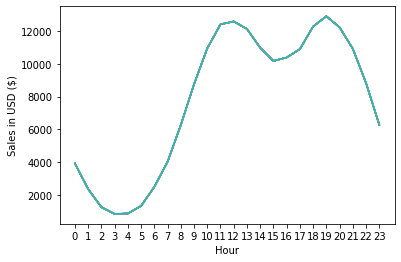

In [ ]:
hours = [hour for hour, df in df.groupby('Hour')]

plt.plot(hours,df.groupby(['Hour']).count())
plt.ylabel('Sales in USD ($)')
plt.xlabel('Hour')
plt.xticks(hours)
plt.show()

**Sales by Price Category**

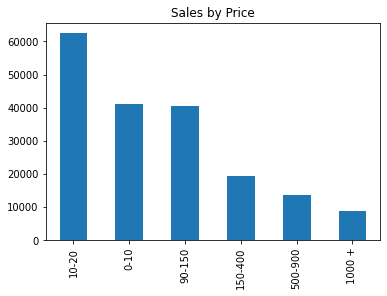

In [ ]:
df['Price Category'].value_counts().plot(kind='bar')
plt.title('Sales by Price')
plt.show()

**Products Frequently Sold Together**

In [ ]:
df1 = df[df['Order ID'].duplicated(keep=False)]
df1.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Hour,Sales,Price Category
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),14,600.00,500-900
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),14,11.99,10-20
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,Los Angeles (CA),19,600.00,500-900
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,Los Angeles (CA),19,11.95,10-20
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,Boston (MA),11,99.99,90-150
31,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,Boston (MA),11,99.99,90-150
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,San Francisco (CA),17,5.98,0-10
33,176586,Google Phone,1,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,San Francisco (CA),17,600.00,500-900
119,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,New York City (NY),11,14.95,10-20
120,176672,USB-C Charging Cable,1,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,New York City (NY),11,11.95,10-20


In [ ]:
df1['Combinations'] = df1.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df1[['Order ID', 'Combinations']].drop_duplicates()
df2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Combinations
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [ ]:
#https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
count = Counter()

for row in df2['Combinations']:

  row_list = row.split(',')
  count.update(Counter(combinations(row_list, 2)))


for key, value in count.most_common(10):

  print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
